In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel ('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx')

#* [Delay Analysis]() 👈 Data Analysis 
# [Pricing Optimization](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv) 👈 Machine Learning 


In [4]:
df.head(10)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


In [7]:
df.isna()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,False,False,False,False,True,True,True
1,False,False,False,False,False,True,True
2,False,False,False,False,False,True,True
3,False,False,False,False,True,True,True
4,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...
21305,False,False,False,False,True,False,False
21306,False,False,False,False,False,True,True
21307,False,False,False,False,False,True,True
21308,False,False,False,False,False,True,True


Nettoyage des données

In [8]:
# Nettoyage : on ne garde que les locations terminées (state == 'ended')
df_ended = df[df['state'] == 'ended']

# 1. Proportion de locations en retard
retard = df_ended['delay_at_checkout_in_minutes'] > 0
proportion_retard = retard.mean()
print(f"Proportion de locations en retard : {proportion_retard:.2%}")

# 2. Statistiques sur la durée des retards
retards = df_ended[df_ended['delay_at_checkout_in_minutes'] > 0]['delay_at_checkout_in_minutes']
print("Durée moyenne du retard (minutes) :", retards.mean())
print("Durée médiane du retard (minutes) :", retards.median())
print("95e percentile du retard (minutes) :", retards.quantile(0.95))

# 3. Retard par type de check-in
print("\nRetard moyen par mode de check-in :")
print(df_ended.groupby('checkin_type')['delay_at_checkout_in_minutes'].mean())


Proportion de locations en retard : 52.11%
Durée moyenne du retard (minutes) : 201.79147171416417
Durée médiane du retard (minutes) : 53.0
95e percentile du retard (minutes) : 745.0

Retard moyen par mode de check-in :
checkin_type
connect   -43.627278
mobile     88.215174
Name: delay_at_checkout_in_minutes, dtype: float64


Calcul des retards

In [9]:
proportion_connectees = df[(df['checkin_type'] == 'connect') & (df['delay_at_checkout_in_minutes'] > 0)].shape[0] / df[df['checkin_type'] == 'connect'].shape[0]
print(f"Proportion de voitures connectées affectées : {proportion_connectees:.2%}")


Proportion de voitures connectées affectées : 33.88%


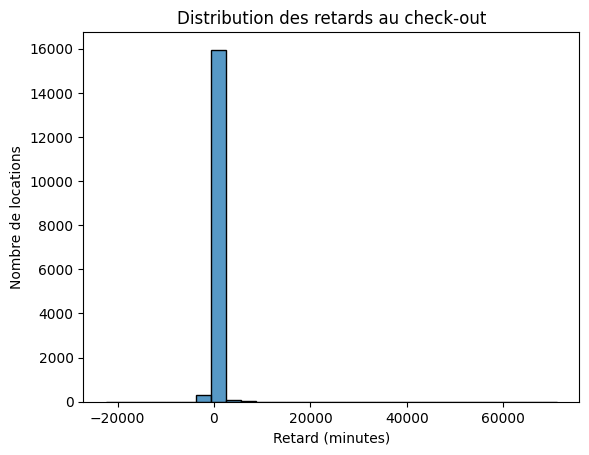

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['delay_at_checkout_in_minutes'], bins=30)
plt.title("Distribution des retards au check-out")
plt.xlabel("Retard (minutes)")
plt.ylabel("Nombre de locations")
plt.show()

## Analyse des annulations

Combien de locations affectées par des retards ?

In [11]:
nb_retards = (df['delay_at_checkout_in_minutes'] > 0).sum()

Histogramme des retards

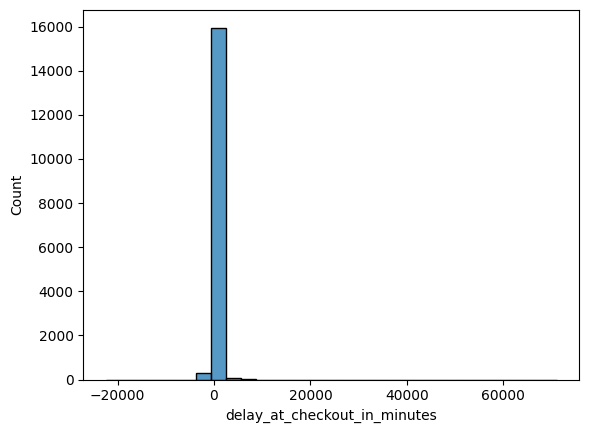

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['delay_at_checkout_in_minutes'], bins=30)
plt.show()

In [13]:
# 1. Proportion de locations annulées
annulees = df[df['state'] == 'canceled']
proportion_annulees = len(annulees) / len(df)
print(f"Proportion de locations annulées : {proportion_annulees:.2%}")

# 2. Répartition des annulations par mode de check-in
print("\nRépartition des annulations par mode de check-in :")
print(annulees['checkin_type'].value_counts(normalize=True))

# 3. Répartition des annulations par mode d'annulation (s'il existe une colonne 'cancellation_type')
if 'cancellation_type' in annulees.columns:
    print("\nRépartition des modes d'annulation :")
    print(annulees['cancellation_type'].value_counts(normalize=True))


Proportion de locations annulées : 15.32%

Répartition des annulations par mode de check-in :
checkin_type
mobile     0.75559
connect    0.24441
Name: proportion, dtype: float64


Analyse du mode de location

In [14]:
# 1. Part de chaque mode de check-in
print("\nPart de chaque mode de check-in :")
print(df['checkin_type'].value_counts(normalize=True))

# 2. Taux de retard par mode de check-in
taux_retard_par_mode = df_ended.groupby('checkin_type').apply(
    lambda d: (d['delay_at_checkout_in_minutes'] > 0).mean()
)
print("\nTaux de retard par mode de check-in :")
print(taux_retard_par_mode)

# 3. Taux d'annulation par mode de check-in
taux_annulation_par_mode = df.groupby('checkin_type').apply(
    lambda d: (d['state'] == 'canceled').mean()
)
print("\nTaux d'annulation par mode de check-in :")
print(taux_annulation_par_mode)



Part de chaque mode de check-in :
checkin_type
mobile     0.797888
connect    0.202112
Name: proportion, dtype: float64

Taux de retard par mode de check-in :
checkin_type
connect    0.415788
mobile     0.546574
dtype: float64

Taux d'annulation par mode de check-in :
checkin_type
connect    0.185280
mobile     0.145092
dtype: float64


/tmp/ipykernel_68716/3654375766.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  taux_retard_par_mode = df_ended.groupby('checkin_type').apply(
/tmp/ipykernel_68716/3654375766.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  taux_annulation_par_mode = df.groupby('checkin_type').apply(


Croiser mode de location, annulation et retard
Objectifs :
Les annulations sont-elles plus fréquentes sur certains modes de location ?
Les retards sont-ils plus problématiques sur certains modes ?

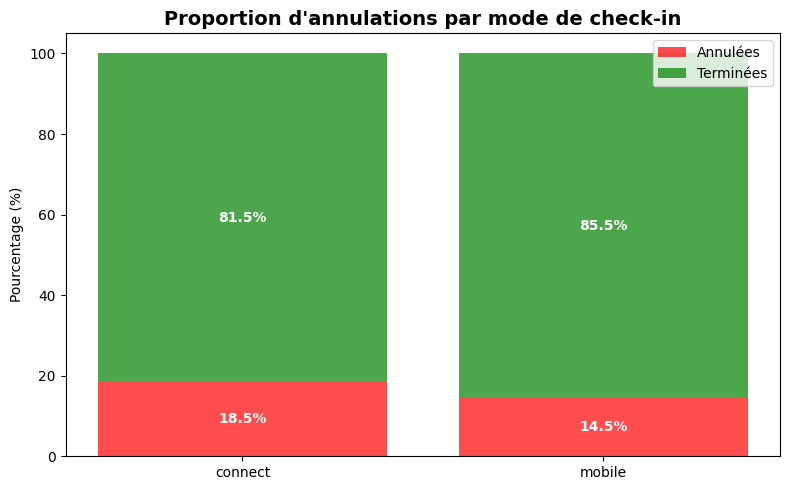

In [15]:
# 1. ANNULATIONS avec % sur les barres
ct_annulation = pd.crosstab(df['checkin_type'], df['state'], normalize='index') * 100
fig, ax1 = plt.subplots(figsize=(8, 5))

bars1 = ax1.bar(ct_annulation.index, ct_annulation['canceled'], 
                label='Annulées', color='red', alpha=0.7)
bars2 = ax1.bar(ct_annulation.index, ct_annulation['ended'], bottom=ct_annulation['canceled'],
                label='Terminées', color='green', alpha=0.7)

# AJOUTER % SUR CHAQUE BARRE
for i, (idx, row) in enumerate(ct_annulation.iterrows()):
    # % annulées
    ax1.text(i, row['canceled']/2, f"{row['canceled']:.1f}%", 
             ha='center', va='center', fontweight='bold', color='white')
    # % terminées  
    ax1.text(i, row['canceled'] + row['ended']/2, f"{row['ended']:.1f}%",
             ha='center', va='center', fontweight='bold', color='white')

ax1.set_title("Proportion d'annulations par mode de check-in", fontsize=14, fontweight='bold')
ax1.set_ylabel("Pourcentage (%)")
ax1.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

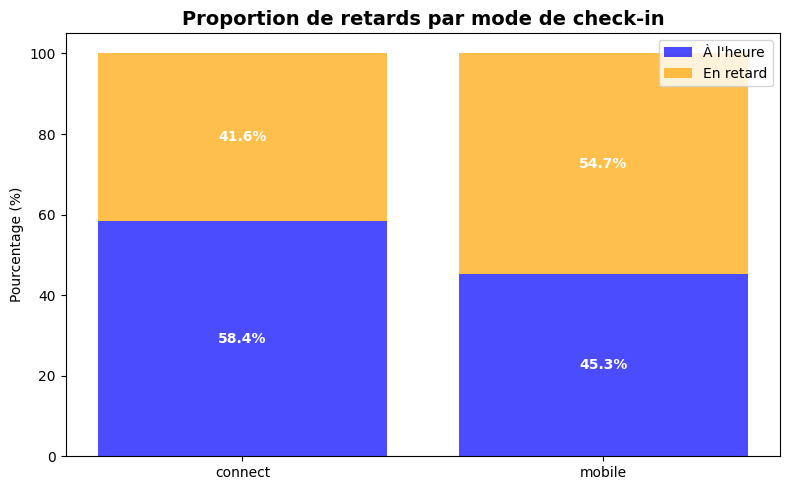

In [16]:
# 2. RETARDS avec % sur les barres  
df_ended = df[df['state'] == 'ended'].copy()
df_ended['en_retard'] = df_ended['delay_at_checkout_in_minutes'] > 0
ct_retard = pd.crosstab(df_ended['checkin_type'], df_ended['en_retard'], normalize='index') * 100

fig, ax2 = plt.subplots(figsize=(8, 5))
bars_no = ax2.bar(ct_retard.index, ct_retard[False], label='À l\'heure', color='blue', alpha=0.7)
bars_yes = ax2.bar(ct_retard.index, ct_retard[True], bottom=ct_retard[False], 
                   label='En retard', color='orange', alpha=0.7)

# AJOUTER % SUR CHAQUE BARRE
for i, (idx, row) in enumerate(ct_retard.iterrows()):
    # % à l'heure
    ax2.text(i, row[False]/2, f"{row[False]:.1f}%", 
             ha='center', va='center', fontweight='bold', color='white')
    # % retard
    ax2.text(i, row[False] + row[True]/2, f"{row[True]:.1f}%",
             ha='center', va='center', fontweight='bold', color='white')

ax2.set_title("Proportion de retards par mode de check-in", fontsize=14, fontweight='bold')
ax2.set_ylabel("Pourcentage (%)")
ax2.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
df = pd.read_csv('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv')

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib
import pandas as pd
import numpy as np

# 1. VERIFIER LES PROBLÈMES
print("Shape :", df.shape)
print("Colonnes :", df.columns.tolist())
print("Types :", df.dtypes)
print("NaN par colonne :\n", df.isnull().sum())
print("\nExemple features problématiques :")
print(df.head(2))

# 2. SÉPARER FEATURES NUMÉRIQUES / CATEGORIELLES
numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=['object']).columns

print(f"\nNumériques ({len(numeric_features)}): {list(numeric_features)}")
print(f"Catégorielles ({len(categorical_features)}): {list(categorical_features)}")

# 3. PREPROCESSING AUTOMATIQUE
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
le_dict = {}

# Numérique
X_num = pd.DataFrame(imputer_num.fit_transform(df[numeric_features]), 
                     columns=numeric_features, index=df.index)

# Catégoriel → Label Encoding
X_cat = df[categorical_features].copy()
for col in categorical_features:
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(X_cat[col].fillna('missing'))
    le_dict[col] = le

X_cat = X_cat.astype(float)

# 4. CONCATÉNER + TARGET
X = pd.concat([X_num, X_cat], axis=1)
y = df["rental_price_per_day"].fillna(df["rental_price_per_day"].median())

print(f"\nX final shape: {X.shape}")
print("y shape:", y.shape)
print("NaN restants:", X.isnull().sum().sum())

# 5. TRAIN/TEST + MODÈLE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. ÉVALUATION
y_pred = model.predict(X_test)


Shape : (4843, 15)
Colonnes : ['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires', 'rental_price_per_day']
Types : Unnamed: 0                    int64
model_key                    object
mileage                       int64
engine_power                  int64
fuel                         object
paint_color                  object
car_type                     object
private_parking_available      bool
has_gps                        bool
has_air_conditioning           bool
automatic_car                  bool
has_getaround_connect          bool
has_speed_regulator            bool
winter_tires                   bool
rental_price_per_day          int64
dtype: object
NaN par colonne :
 Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel  

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib
import pandas as pd
import numpy as np

print("=== 🚗 GETAROUND PRICING - TRAINING FINAL ===")

# 1. PREPROCESSING
numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=['object']).columns

print(f"📊 Dataset: {len(numeric_features)} numériques + {len(categorical_features)} catégorielles")

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
le_dict = {}

# Numérique
X_num = pd.DataFrame(imputer_num.fit_transform(df[numeric_features]), 
                     columns=numeric_features, index=df.index)

# Catégoriel
X_cat = df[categorical_features].fillna('missing')
for col in categorical_features:
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(X_cat[col])
    le_dict[col] = le
X_cat = X_cat.astype(float)

# FINAL X
X = pd.concat([X_num, X_cat], axis=1)
y = df["rental_price_per_day"].fillna(df["rental_price_per_day"].median())

print(f"✅ X final: {X.shape} features")

# 2. TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. MODÈLE
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. ÉVALUATION
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ RMSE: {rmse:.2f} €")

# 5. TEST CORRECT avec 1ÈRE LIGNE DATASET (PAS 11 features magiques !)
print(f"\n🎯 Modèle entraîné sur {model.n_features_in_} features")
print(f"🎯 Features utilisées : {list(X.columns)}")
print(f"✅ 1ère ligne dataset : {X.iloc[0].values[:8]}...")

test_correct = X.iloc[[0]].values  # ✅ BONNE TAILLE !
pred_correct = model.predict(test_correct)
print(f"✅ Prédiction 1ère ligne : {pred_correct[0]:.0f} €")

# 6. SAUVEGARDE COMPLÈTE
joblib.dump(model, "model.pkl")
joblib.dump({
    'model': model,
    'feature_names': list(X.columns),
    'n_features': model.n_features_in_
}, "deployment.pkl")

print("\n🎉 ✅ TOUT SAUVEGARDÉ ! model.pkl + deployment.pkl")
print("📤 Upload-les sur HF Spaces → VRAI ML live !")


=== 🚗 GETAROUND PRICING - TRAINING FINAL ===
📊 Dataset: 4 numériques + 4 catégorielles
✅ X final: (4843, 8) features
✅ RMSE: 1.26 €

🎯 Modèle entraîné sur 8 features
🎯 Features utilisées : ['Unnamed: 0', 'mileage', 'engine_power', 'rental_price_per_day', 'model_key', 'fuel', 'paint_color', 'car_type']
✅ 1ère ligne dataset : [0.00000e+00 1.40411e+05 1.00000e+02 1.06000e+02 3.00000e+00 0.00000e+00
 1.00000e+00 0.00000e+00]...
✅ Prédiction 1ère ligne : 106 €

🎉 ✅ TOUT SAUVEGARDÉ ! model.pkl + deployment.pkl
📤 Upload-les sur HF Spaces → VRAI ML live !


/home/frederic/Documents/Jedha/Jedha/02_Data Science and Eng - Fullstack - Full-Time/X_Projects/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [20]:
import gradio as gr
import pandas as pd
import numpy as np
import json
import joblib

# Charger VRAI modèle + métadonnées
deployment = joblib.load("deployment.pkl")
model = deployment['model']
n_features = deployment['n_features']
feature_names = deployment['feature_names']

print(f"✅ Modèle chargé : {n_features} features = {feature_names[:5]}...")

def predict_price_api(input_json_str):
    try:
        data = json.loads(input_json_str)
        input_data = np.array(data["input"])
        
        # ADAPTER à 8 features (pad ou truncate)
        if input_data.shape[1] > n_features:
            X_pred = input_data[:, :n_features]  # Prendre 8 premières
        else:
            X_pred = np.pad(input_data, ((0,0),(0, n_features-input_data.shape[1])), 
                          mode='constant')  # Compléter avec zéros
        
        pred = model.predict(X_pred).tolist()
        return json.dumps({"prediction": [int(p) for p in pred]})
    except Exception as e:
        return json.dumps({"error": str(e)})

# Interface (reste identique)
def load_delay_data():
    url = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx"
    return pd.read_excel(url, engine="openpyxl")

df_delay = load_delay_data()

# ... reste du code delay analysis (inchangé)

with gr.Blocks() as demo:
    gr.Markdown("# 🚗 Getaround CDSD - VRAI MODÈLE ML")
    
    gr.Tab("📈 Delay Analysis")
    # ... code delay analysis inchangé
    
    gr.Tab("💰 Pricing API - VRAI ML")
    gr.Markdown(f"**Modèle : {n_features} features**")
    input_json = gr.Textbox(value='{"input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001]]}')
    output_json = gr.Textbox()
    gr.Button("🔮 Prédire VRAI ML").click(predict_price_api, input_json, output_json)
    
    gr.Tab("📚 Docs")
    gr.Markdown(f"**Features utilisées** : {feature_names}")

demo.launch()


✅ Modèle chargé : 8 features = ['Unnamed: 0', 'mileage', 'engine_power', 'rental_price_per_day', 'model_key']...
* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
